In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! pip install -q kaggle

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!kaggle datasets download -d kevinarvai/clinvar-conflicting

  0% 0.00/3.59M [00:00<?, ?B/s]
100% 3.59M/3.59M [00:00<00:00, 45.6MB/s]


In [6]:
!unzip /content/clinvar-conflicting.zip

Archive:  /content/clinvar-conflicting.zip
  inflating: clinvar_conflicting.csv  


In [7]:
df = pd.read_csv("/content/clinvar_conflicting.csv")
df

<ipython-input-7-fc9d07ec191b>:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/clinvar_conflicting.csv")


,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65183,X,154158201,T,G,0.0801,0.13923,0.1605,"MedGen:C0019069,OMIM:306700,SNOMED_CT:28293008...",NaN,Hereditary_factor_VIII_deficiency_disease|not_...,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,0.105,-0.630908,NaN
65184,X,154159118,C,T,0.0020,0.00060,0.0013,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",...,tolerated,benign,NaN,NaN,NaN,NaN,0.00158,0.002,-1.731470,3.0
65185,X,154194886,C,T,0.0125,0.00370,0.0111,MedGen:CN169374|MedGen:CN239152,NaN,"not_specified|Hemophilia_A,_FVIII_Deficiency",...,NaN,NaN,NaN,NaN,NaN,NaN,0.00158,12.850,1.412434,NaN
65186,X,154490187,T,C,0.0003,0.00034,0.0000,"MedGen:C3501611,Orphanet:ORPHA777|MedGen:CN169374",NaN,Non-syndromic_X-linked_intellectual_disability...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130,-0.592415,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

# Data Cleaning

### Dropping features with null/mostly null values

In [9]:
df.isnull().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65021
CLNDN                     0
CLNDNINCL             65021
CLNHGVS                   0
CLNSIGINCL            65021
CLNVC                     0
CLNVI                 37529
MC                      846
ORIGIN                    0
SSR                   65058
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [10]:
df = df.drop(['CLNDISDBINCL', 'CLNDNINCL', 'CLNSIGINCL', 'SSR', 'DISTANCE', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE'], axis=1)
df.head()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,CLNHGVS,...,Amino_acids,Codons,STRAND,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,not_specified,NC_000001.10:g.1168180G>C,...,E/D,gaG/gaC,1.0,NaN,tolerated,benign,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",Spinocerebellar_ataxia_21|not_provided,NC_000001.10:g.1470752G>A,...,P/L,cCg/cTg,-1.0,OK,deleterious_low_confidence,benign,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NC_000001.10:g.1737942A>G,...,I/T,aTc/aCc,-1.0,OK,deleterious,probably_damaging,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",Shprintzen-Goldberg_syndrome|not_provided,NC_000001.10:g.2160305G>A,...,G/S,Ggc/Agc,1.0,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",Shprintzen-Goldberg_syndrome,NC_000001.10:g.2160305G>T,...,G/C,Ggc/Tgc,1.0,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


### CHROM

This feature contains repeated values for certain numbers in integer and string data type. So we convert it all to string.

In [11]:
df['CHROM'] = df['CHROM'].astype(str)

### POS

This feature has a large number of unique values. Hence we drop it.

In [12]:
df = df.drop(['POS'], axis=1)

### REF, ALT, Allele

These features have most of their values in [A, G, T, C]. So we combine the rest into an 'Other' category.

In [13]:
df['REF'] = df['REF'].apply(lambda x: 'Other' if x not in ['A', 'C', 'G', 'T'] else x)
df['ALT'] = df['ALT'].apply(lambda x: 'Other' if x not in ['A', 'C', 'G', 'T'] else x)
df['Allele'] = df['Allele'].apply(lambda x: 'Other' if x not in ['A', 'C', 'G', 'T'] else x)

### CLNDISDB

This feature contains ID's for diseases in other databases. Contains mostly unique values, so we drop.

In [14]:
df = df.drop(['CLNDISDB'], axis=1)

### CLNDN

Feature contains various disease names that go into thousands when encoded. We choose to drop.

In [15]:
df = df.drop(['CLNDN'], axis=1)

### CLNHGVS

This feature has 65188 unique values, hence is meaningless. We drop it.

In [16]:
df = df.drop(['CLNHGVS'],axis=1)

### CLNVS

We will combine low frequency classes into an 'Other' category.

In [17]:
threshold = 100
clnvs_counts = df['CLNVC'].value_counts()
low_freq_classes = clnvs_counts[clnvs_counts < threshold].index

In [18]:
df.loc[df['CLNVC'].isin(low_freq_classes), 'CLNVC'] = 'Other'

### CLNVI, INTRON, BAM_EDIT, SIFT, PolyPhen, BLOSUM62

These features contain approximately 50% null values so instead of dropping them, we will be dichotomizing them.

Dichotomize - Assign all null values as 0 and the rest as 1, so as to distinguish between absent and present values.

In [19]:
for variable in ['CLNVI', 'INTRON', 'BAM_EDIT', 'SIFT', 'PolyPhen', 'BLOSUM62']:
    df[variable] = df[variable].apply(lambda x: 1 if x == x else 0)

### MC

Feature contains various variant names that go into thousands when encoded. We choose to drop.

In [20]:
df = df.drop(['MC'], axis=1)

### ORIGIN

We will be combining low frequency classes into one group. Since the majority instances are 1, we will categorize the rest as 0.

In [21]:
df['ORIGIN'].value_counts()

1      63940
33       330
3        270
5        200
17       189
9        144
25        21
49        16
0         14
32        11
35         6
65         6
513        6
41         5
2          5
4          3
13         3
21         3
57         2
16         2
37         2
69         1
129        1
12         1
85         1
29         1
27         1
43         1
19         1
11         1
53         1
Name: ORIGIN, dtype: int64

In [22]:
threshold = 63940
value_counts = df['ORIGIN'].value_counts()
to_combine = value_counts[value_counts < threshold].index
df['ORIGIN'] = df['ORIGIN'].replace(to_combine, 0)

### Consequence

Feature contains various variant names that go into thousands when encoded. We choose to drop.

In [23]:
df = df.drop(['Consequence'], axis=1)

### SYMBOL

This feature has approximately 2300 unique values so we keep the top 100 as is, and combine the remaining into an 'Other' category.

In [24]:
threshold = 100
symbol_counts = df['SYMBOL'].value_counts()
low_freq_classes = symbol_counts[symbol_counts < threshold].index

In [25]:
df.loc[df['SYMBOL'].isin(low_freq_classes), 'SYMBOL'] = 'Other'

### Feature_type

Almost all instances except 2 have the same value making this feature redundant. Hence, we drop.

In [26]:
df = df.drop(['Feature_type'], axis=1)

### Feature

This feature contains ID's associated with gene name. We are dropping the numerical code and keeping gene location information intact to retain useful information instead of simply dropping.

In [27]:
import re
import numpy as np
df['Feature'] = df['Feature'].astype(str)
df['Feature'] = df['Feature'].apply(lambda x: re.sub(r'\d+', '', x) if isinstance(x, str) else x)
df['Feature'] = df['Feature'].apply(lambda x: x if ('XM' in x or 'NM' in x) else 'Other')
df['Feature'] = df['Feature'].replace('nan', np.nan)

In [28]:
df['Feature'] = df['Feature'].apply(lambda x: re.findall(r'(NM|XM)', str(x))[0] if re.findall(r'(NM|XM)', str(x)) else 'Other')

### BIOTYPE

Almost all instances except 14 have the same value making this feature redundant. Hence, we drop.

In [29]:
df = df.drop(['BIOTYPE'], axis=1)

### EXON

We will keep the first 100 values and combine the rest into an 'Other' category.

In [30]:
threshold = 100
exon_counts = df['EXON'].value_counts()
low_freq_classes = exon_counts[exon_counts < threshold].index

In [31]:
df.loc[df['EXON'].isin(low_freq_classes), 'EXON'] = 'Other'

### cDNA_position, CDS_position, Protein_position

These features contain high amounts of unique values, upwards of 13000 values. So we decide to drop them.

In [32]:
df = df.drop(['cDNA_position', 'CDS_position', 'Protein_position'], axis=1)

### Amino_acids

This contains approximately 10000 null values. We will separate the top 100 individually, and group the remaining as 'Other' category including null values.

In [33]:
top_100_list = df['Amino_acids'].value_counts()[0:100].index

In [34]:
df['Amino_acids'] = df['Amino_acids'].apply(lambda x: x if x in top_100_list else 'Other')

### Codons

This category contains approximately 10000 null values. If we keep the top 100 and group the rest, then we get extremely inbalanced data, with 'Other' containing 32000 values. So we drop it.

In [35]:
df = df.drop(['Codons'], axis=1)

### STRAND

It has 14 null values, so we drop the rows with the null values.

In [36]:
df = df[df['STRAND'].notna()]

### LoFtool, CADD_RAW, CADD_PHRED

We will replace the null values with the median for the respective feature.

In [37]:
df['LoFtool'] = df['LoFtool'].replace(np.NaN, df['LoFtool'].median())
df['CADD_RAW'] = df['CADD_RAW'].replace(np.NaN, df['CADD_RAW'].median())
df['CADD_PHRED'] = df['CADD_PHRED'].replace(np.NaN, df['CADD_PHRED'].median())

<ipython-input-37-ddbf55427489>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LoFtool'] = df['LoFtool'].replace(np.NaN, df['LoFtool'].median())
<ipython-input-37-ddbf55427489>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CADD_RAW'] = df['CADD_RAW'].replace(np.NaN, df['CADD_RAW'].median())
<ipython-input-37-ddbf55427489>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

This marks the end for data cleaning. We will save the cleaned dataset as a csv so that we can refer for any future requirement.

In [38]:
df.to_csv('clinvar_conflicting_cleaned.csv')


# Encoding the Categorical columns

In [39]:
columns = df.columns[0:25]
columns

Index(['CHROM', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNVC', 'CLNVI',
       'ORIGIN', 'CLASS', 'Allele', 'IMPACT', 'SYMBOL', 'Feature', 'EXON',
       'INTRON', 'Amino_acids', 'STRAND', 'BAM_EDIT', 'SIFT', 'PolyPhen',
       'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'BLOSUM62'],
      dtype='object')

In [40]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65174 entries, 0 to 65187
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CHROM        65174 non-null  object 
 1   REF          65174 non-null  object 
 2   ALT          65174 non-null  object 
 3   AF_ESP       65174 non-null  float64
 4   AF_EXAC      65174 non-null  float64
 5   AF_TGP       65174 non-null  float64
 6   CLNVC        65174 non-null  object 
 7   CLNVI        65174 non-null  int64  
 8   ORIGIN       65174 non-null  int64  
 9   CLASS        65174 non-null  int64  
 10  Allele       65174 non-null  object 
 11  IMPACT       65174 non-null  object 
 12  SYMBOL       65172 non-null  object 
 13  Feature      65174 non-null  object 
 14  EXON         56295 non-null  object 
 15  INTRON       65174 non-null  int64  
 16  Amino_acids  65174 non-null  object 
 17  STRAND       65174 non-null  float64
 18  BAM_EDIT     65174 non-null  int64  
 19  SIFT

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder_1 = LabelEncoder()
encoder_2 = LabelEncoder()
encoder_3 = LabelEncoder()
encoder_4 = LabelEncoder()
encoder_5 = LabelEncoder()
encoder_6 = LabelEncoder()
encoder_7 = LabelEncoder()
encoder_8 = LabelEncoder()
encoder_9 = LabelEncoder()
encoder_10 = LabelEncoder()

In [42]:
df['CHROM'] = encoder_1.fit_transform(df['CHROM'])
df['REF'] = encoder_2.fit_transform(df['REF'])
df['ALT'] = encoder_3.fit_transform(df['ALT'])
df['CLNVC'] = encoder_4.fit_transform(df['CLNVC'])
df['Allele'] = encoder_5.fit_transform(df['Allele'])
df['IMPACT'] = encoder_6.fit_transform(df['IMPACT'])
df['SYMBOL'] = encoder_7.fit_transform(df['SYMBOL'])
df['Feature'] = encoder_8.fit_transform(df['Feature'])
df['EXON'] = encoder_9.fit_transform(df['EXON'])
df['Amino_acids'] = encoder_10.fit_transform(df['Amino_acids'])

# X and Y Split

In [43]:
X = df.drop(['CLASS'], axis=1)

In [44]:
Y = df['CLASS']

# Scaling the Dataset

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Evalution of Classfication Models

Defining the Classifiers

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [50]:
classifiers = {
    'Logistic Regression': LogisticRegression(solver='saga', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

 Calculating accuracy and precision for each classifier

In [51]:
accuracy_results = []
precision_results = []
recall_results = []
f1_score_results = []

for key, classifier in classifiers.items():
    pipeline = Pipeline(steps=[('classifier', classifier)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy_results.append((key, accuracy))
    precision_results.append((key, precision))
    recall_results.append((key, recall))
    f1_score_results.append((key, f1))

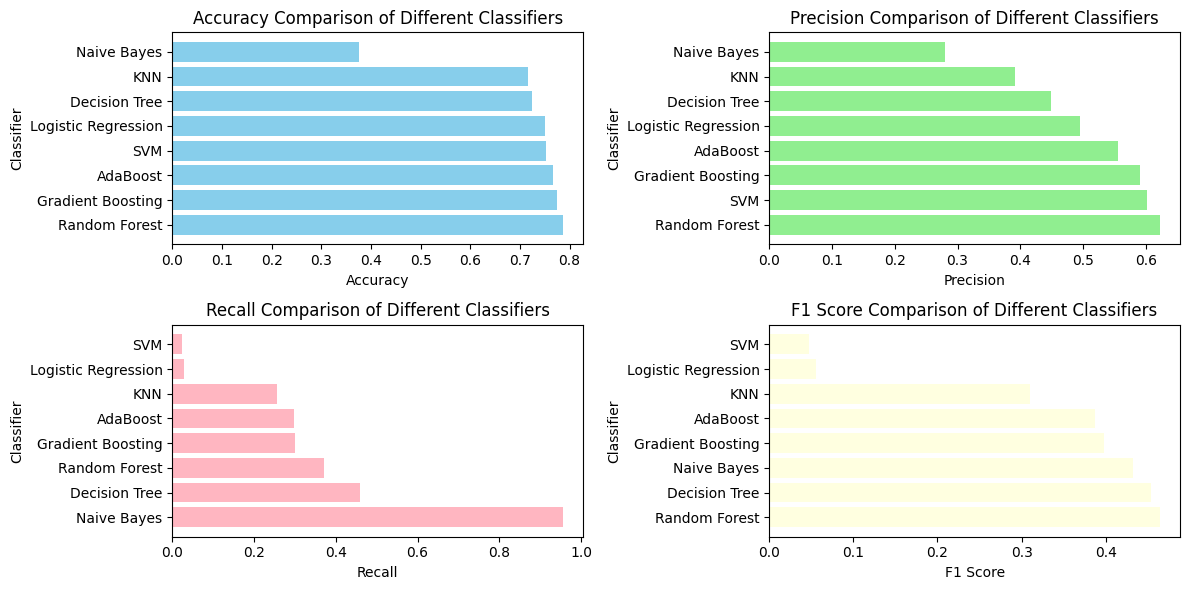

In [52]:
accuracy_results.sort(key=lambda x: x[1], reverse=True)
precision_results.sort(key=lambda x: x[1], reverse=True)
recall_results.sort(key=lambda x: x[1], reverse=True)
f1_score_results.sort(key=lambda x: x[1], reverse=True)


labels, values = zip(*accuracy_results)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.barh(labels, values, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Classifier')
plt.title('Accuracy Comparison of Different Classifiers')

labels, values = zip(*precision_results)
plt.subplot(2, 2, 2)
plt.barh(labels, values, color='lightgreen')
plt.xlabel('Precision')
plt.ylabel('Classifier')
plt.title('Precision Comparison of Different Classifiers')

labels, values = zip(*recall_results)
plt.subplot(2, 2, 3)
plt.barh(labels, values, color='lightpink')
plt.xlabel('Recall')
plt.ylabel('Classifier')
plt.title('Recall Comparison of Different Classifiers')

labels, values = zip(*f1_score_results)
plt.subplot(2, 2, 4)
plt.barh(labels, values, color='lightyellow')
plt.xlabel('F1 Score')
plt.ylabel('Classifier')
plt.title('F1 Score Comparison of Different Classifiers')

plt.tight_layout()
plt.show()


# Comparing overall performance of each classifier


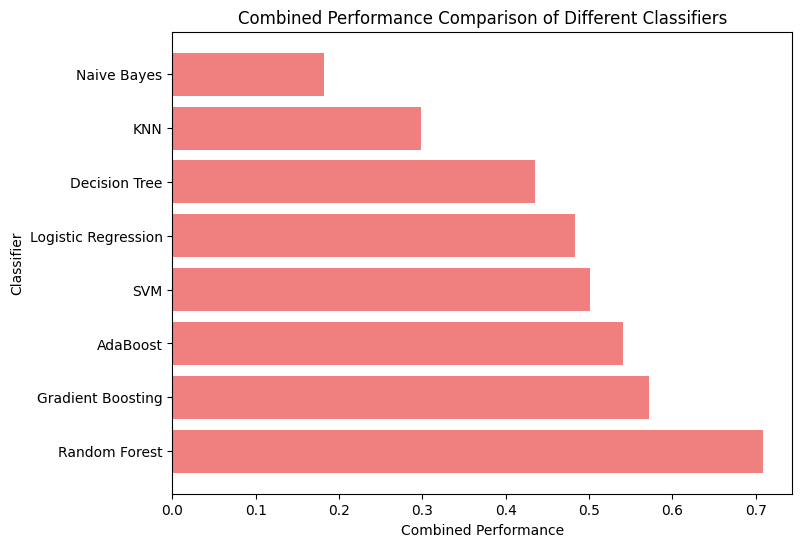

In [53]:
combined_results = [(label, (accuracy + precision + recall + f1) / 4) for (label, accuracy), (_, precision), (_, recall), (_, f1) in zip(accuracy_results, precision_results, recall_results, f1_score_results)]
combined_results.sort(key=lambda x: x[1], reverse=True)

labels, values = zip(*combined_results)
plt.figure(figsize=(8, 6))
plt.barh(labels, values, color='lightcoral')
plt.xlabel('Combined Performance')
plt.ylabel('Classifier')
plt.title('Combined Performance Comparison of Different Classifiers')
plt.show()

# Data Visualization

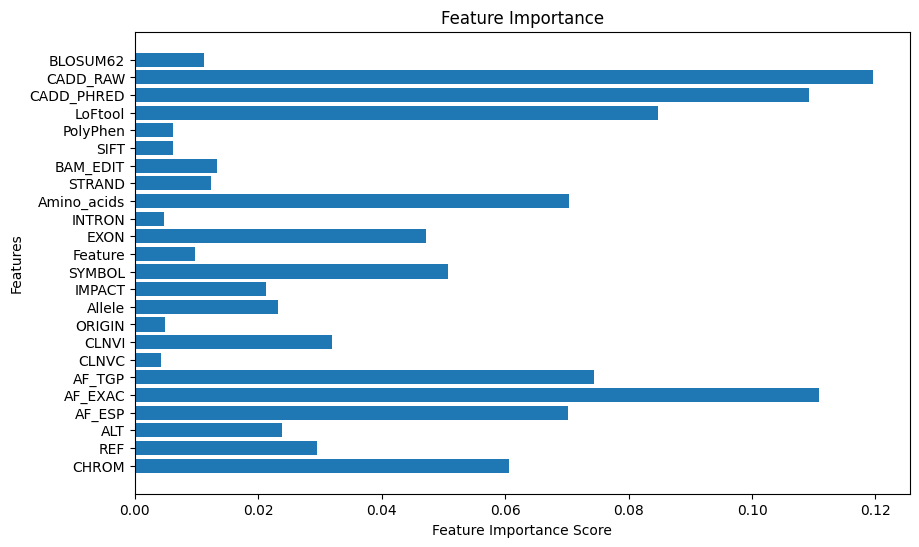

In [54]:
plt.figure(figsize=(10, 6))
model = RandomForestClassifier()
model.fit(X, Y)
feature_importance = model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

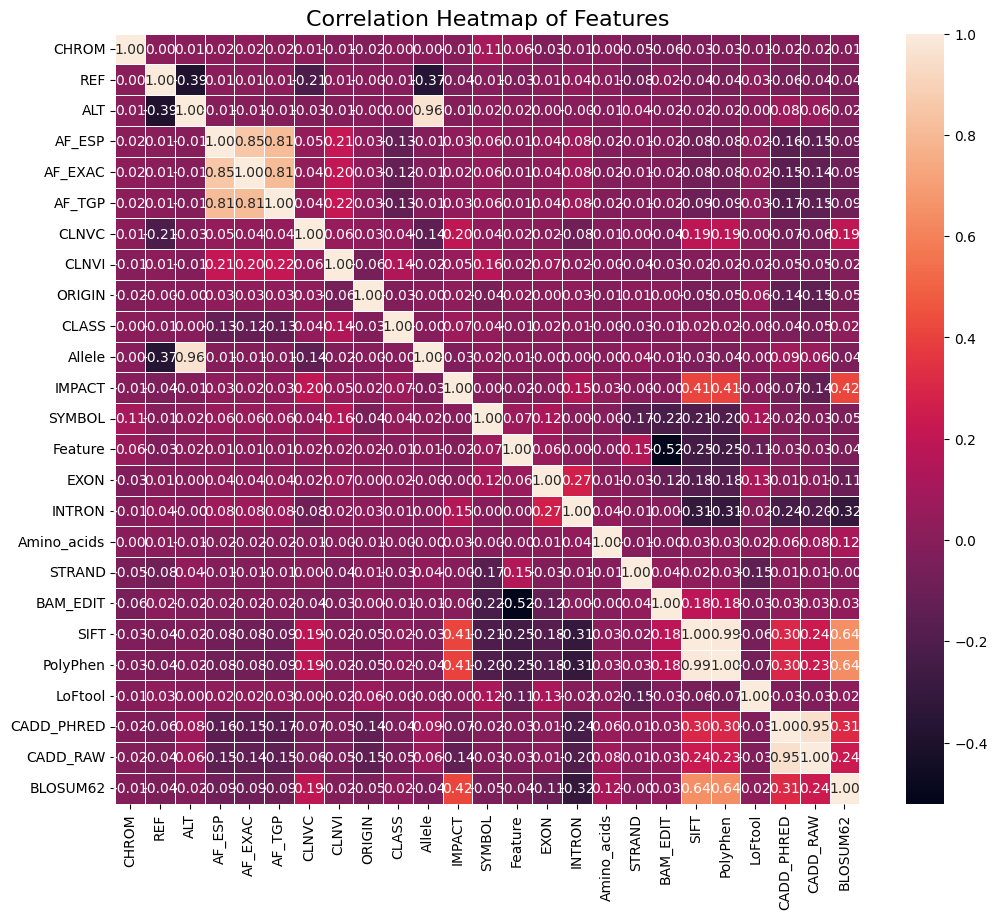

In [55]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[columns].corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

# Model Building

In [56]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = rfc.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


# Dumping into a pickle file

In [58]:
import pickle

In [59]:
pickle.dump(rfc, open('model.pkl', 'wb'))

In [60]:
pickle.dump(scaler, open('Scaler.pkl', 'wb'))

In [61]:
pickle.dump(encoder_1, open('Encoder_1.pkl', 'wb'))
pickle.dump(encoder_2, open('Encoder_2.pkl', 'wb'))
pickle.dump(encoder_3, open('Encoder_3.pkl', 'wb'))
pickle.dump(encoder_4, open('Encoder_4.pkl', 'wb'))
pickle.dump(encoder_5, open('Encoder_5.pkl', 'wb'))
pickle.dump(encoder_6, open('Encoder_6.pkl', 'wb'))
pickle.dump(encoder_7, open('Encoder_7.pkl', 'wb'))
pickle.dump(encoder_8, open('Encoder_8.pkl', 'wb'))
pickle.dump(encoder_9, open('Encoder_9.pkl', 'wb'))
pickle.dump(encoder_10, open('Encoder_10.pkl', 'wb'))

In [62]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
files.download('Scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
for i in range(1,11):
  files.download(f'Encoder_{i}.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
temp = X_scaled.iloc[0:1, :]
temp

,CHROM,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNVC,CLNVI,ORIGIN,Allele,...,INTRON,Amino_acids,STRAND,BAM_EDIT,SIFT,PolyPhen,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,0.0,0.5,0.25,0.154509,0.200444,0.213285,1.0,1.0,1.0,0.25,...,0.0,0.19,1.0,0.0,1.0,1.0,0.156942,0.010626,0.101256,1.0


In [69]:
result = rfc.predict(temp)
result

array([0])